<a href="https://colab.research.google.com/github/bindukovvada/Appliances_Energy_Prediction/blob/main/Bindu_Applicances_Energy_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>Appliances Energy Prediction</b>

#<b>Aim:  Data-driven prediction of energy use of appliances</b>

#The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column.


# <b>Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes(parameters)</b>

#<b>About the data:

### <b>The columns in the given dataset are as follows:</b>
###<b>date</b> - time year-month-day hour:minute:second
###<b>Appliances</b> - energy use in Wh (Dependent variable)
###<b>lights</b> -  energy use of light fixtures in the house in Wh (Drop this column)
###<b>T1</b> - Temperature in kitchen area, in Celsius
###<b>T2</b> - Temperature in living room area, in Celsius
###<b>T3</b> - Temperature in laundry room area, in Celsius
###<b>T4</b> - Temperature in office room, in Celsius
###<b>T5</b> - Temperature in bathroom, in Celsius
###<b>T6</b> - Temperature outside the building (north side), in Celsius
###<b>T7</b> - Temperature in ironing room , in Celsius
###<b>T8</b> - Temperature in teenager room 2, in Celsius
###<b>T9</b>,Temperature in parents room, in Celsius
###<b>To</b>, Temperature outside (from Chievres weather station), in Celsius 
###<b>RH1</b> - Humidity in kitchen area, in % 
###<b>RH2</b> - Humidity in living room area, in %
###<b>RH3</b> - Humidity in laundry room area, in %  
###<b>RH4</b> - Humidity in office room, in %
###<b>RH5</b> - Humidity in bathroom, in % 
###<b>RH6</b> - Humidity outside the building (north side), in %
###<b>RH7</b> - Humidity in ironing room, in %  
###<b>RH8</b> - Humidity in teenager room 2</b>, in %
###<b>RH9</b>  - Humidity in parents room, in %
###<b>Pressure</b> (from Chievres weather station), in mm 
###<b>Hg RHout</b> - Humidity outside (from Chievres weather station), in %
###<b>Wind speed</b> (from Chievres weather station), in m/s
###<b>Visibility</b> (from Chievres weather station), in km
###<b>Tdewpoint</b> (from Chievres weather station), Â°C
###<b>rv1</b> - Random variable 1, nondimensional
###<b>rv2</b> - Random variable 2, nondimensional

In [100]:
pip install scikit-optimize  #for skopt and skopt.space

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 8.2 MB/s 


In [103]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from numpy import math
from math import sqrt
from datetime import date
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing, model_selection, metrics
import warnings
warnings.filterwarnings('ignore')

In [104]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [105]:
#Reading the data
df = pd.read_csv('/content/drive/MyDrive/Copy of data_application_energy.csv')

In [106]:
df.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

#Exploratory Data Analysis

In [107]:
#Copying the dataset
energy_df = df

In [108]:
#Finding the size of the dataset
energy_df.shape

(19735, 29)

In [109]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [110]:
energy_df.describe(include='all')

date    Appliances        lights            T1  \
count                 19735  19735.000000  19735.000000  19735.000000   
unique                19735           NaN           NaN           NaN   
top     2016-01-11 17:00:00           NaN           NaN           NaN   
freq                      1           NaN           NaN           NaN   
mean                    NaN     97.694958      3.801875     21.686571   
std                     NaN    102.524891      7.935988      1.606066   
min                     NaN     10.000000      0.000000     16.790000   
25%                     NaN     50.000000      0.000000     20.760000   
50%                     NaN     60.000000      0.000000     21.600000   
75%                     NaN    100.000000      0.000000     22.600000   
max                     NaN   1080.000000     70.000000     26.260000   

                RH_1            T2          RH_2            T3          RH_3  \
count   19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       40.259739     20.341219     40.420420     22.267611     39.242500   
std         3.979299      2.192974      4.069813      2.006111      3.254576   
min        27.023333     16.100000     20.463333     17.200000     28.766667   
25%        37.333333     18.790000     37.900000     20.790000     36.900000   
50%        39.656667     20.000000     40.500000     22.100000     38.530000   
75%        43.066667     21.500000     43.260000     23.290000     41.760000   
max        63.360000     29.856667     56.026667     29.236000     50.163333   

                  T4  ...            T9          RH_9         T_out  \
count   19735.000000  ...  19735.000000  19735.000000  19735.000000   
unique           NaN  ...           NaN           NaN           NaN   
top              NaN  ...           NaN           NaN           NaN   
freq             NaN  ...           NaN           NaN           NaN   
mean       20.855335  ...     19.485828     41.552401      7.411665   
std         2.042884  ...      2.014712      4.151497      5.317409   
min        15.100000  ...     14.890000     29.166667     -5.000000   
25%        19.530000  ...     18.000000     38.500000      3.666667   
50%        20.666667  ...     19.390000     40.900000      6.916667   
75%        22.100000  ...     20.600000     44.338095     10.408333   
max        26.200000  ...     24.500000     53.326667     26.100000   

         Press_mm_hg        RH_out     Windspeed    Visibility     Tdewpoint  \
count   19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      755.522602     79.750418      4.039752     38.330834      3.760707   
std         7.399441     14.901088      2.451221     11.794719      4.194648   
min       729.300000     24.000000      0.000000      1.000000     -6.600000   
25%       750.933333     70.333333      2.000000     29.000000      0.900000   
50%       756.100000     83.666667      3.666667     40.000000      3.433333   
75%       760.933333     91.666667      5.500000     40.000000      6.566667   
max       772.300000    100.000000     14.000000     66.000000     15.500000   

                 rv1           rv2  
count   19735.000000  19735.000000  
unique           NaN           NaN  
top              NaN           NaN  
freq             NaN           NaN  
mean       24.988033     24.988033  
std        14.496634     14.496634  
min         0.005322      0.005322  
25%        12.497889     12.497889  
50%        24.897653     24.897653  
7

In [111]:
#Viewing all the columns
energy_df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [112]:
#Finding Duplicate values
len(energy_df[energy_df.duplicated()])

0

No Duplicates found

In [113]:
#Finding Null values
energy_df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

No Null values found

In [130]:
#Storing the target column into a variable
Dependent_variable = energy_df['Appliances']


In [132]:
#Storing all independent columns into a variable
Independent_variables = energy_df.drop(['Appliances'], axis = 1)


In [122]:
#Change dtype of 'date' column and extracting the date column
energy_df['date'] = pd.to_datetime(energy_df['date'])
energy_df['months'] = energy_df['date'].dt.month
energy_df['hour'] = energy_df['date'].dt.hour
energy_df['week'] = energy_df['date'].dt.week
energy_df['weekday'] = energy_df['date'].dt.weekday

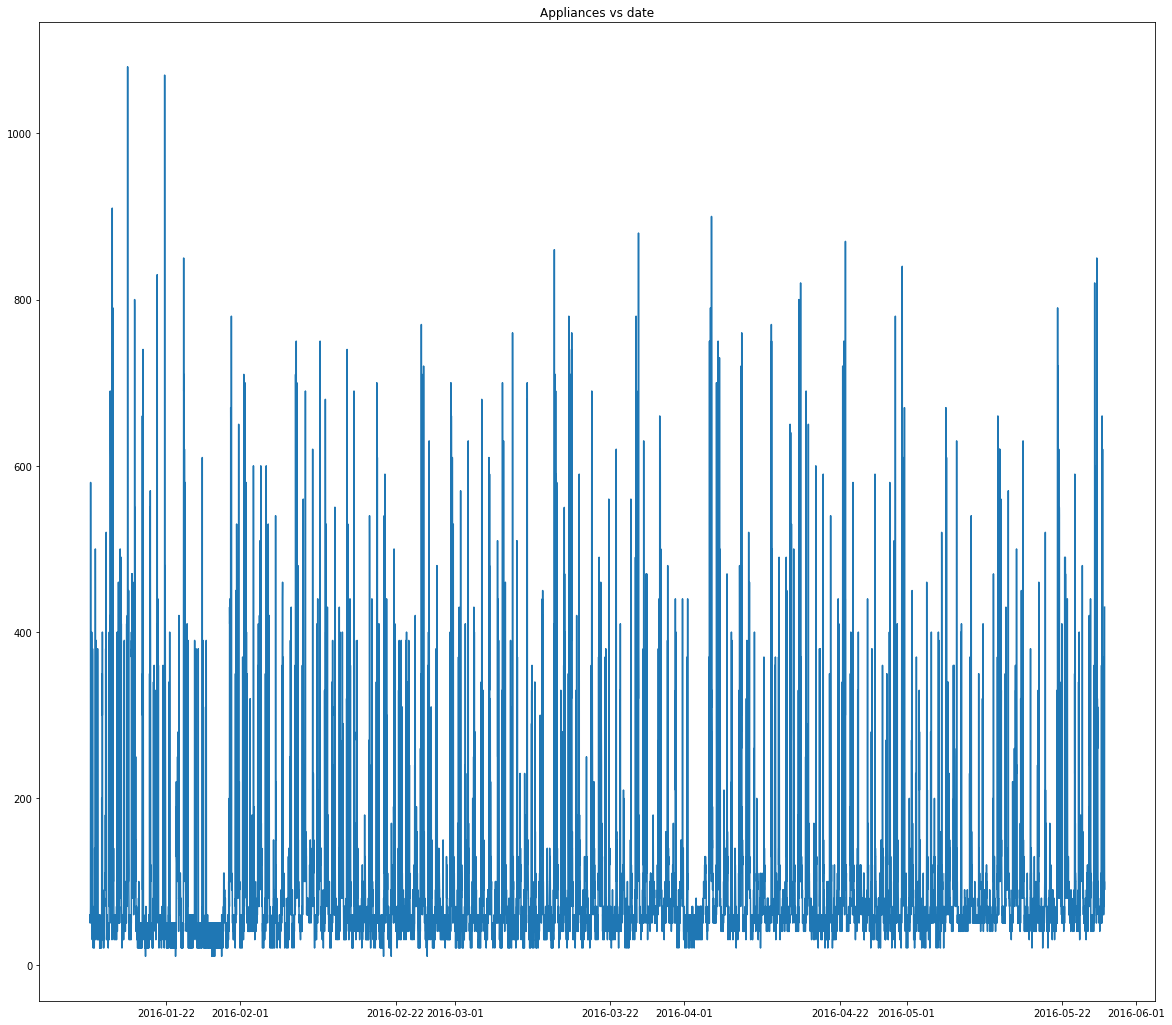

In [123]:
#Find the graph between Appliances and the date column
plt.figure(figsize=(20,18))
plt.plot(energy_df['date'], energy_df['Appliances'])
plt.title('Appliances vs date')
plt.show()


We can see that appliances consuming more energy in the january month when compared to remaining months

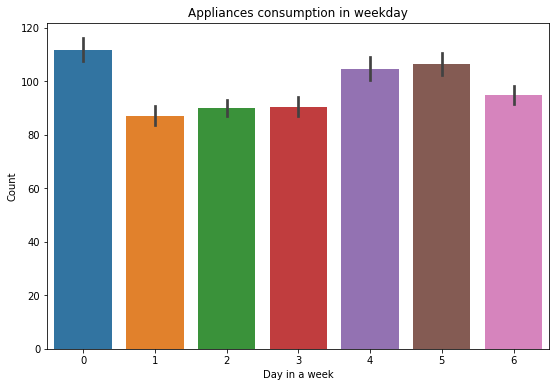

In [124]:
#Checking on which day the consumption is high
fig = plt.figure(figsize=(9, 6))
a=sns.barplot(x = energy_df['weekday'], y = energy_df['Appliances'])
a.set_title('Appliances consumption in weekday')
a.set_xlabel("Day in a week") 
a.set_ylabel('Count')
plt.show()

From the above bar chart, we can see that the energy consumption is high on sundays

In [125]:
#dropping the light column
energy_df.drop('lights', axis=1, inplace=True)

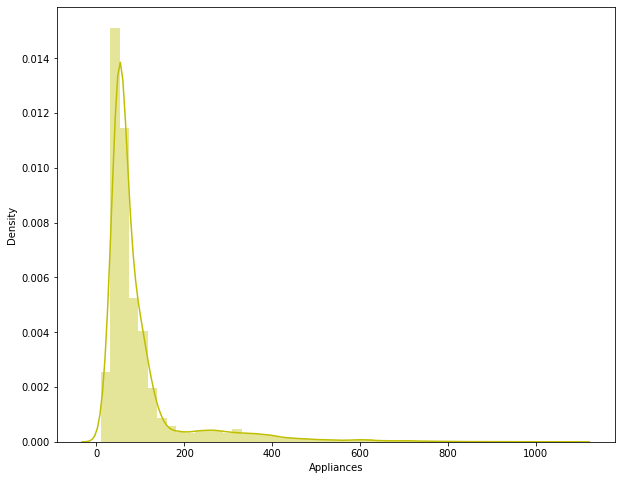

In [127]:
#Checking the distribution of Dependent varibale 'Appliances'
plt.figure(figsize = (10,8))
sns.distplot(energy_df['Appliances'], color = 'y')

Here, we can see that it is right skewed. So, we are doing log transformation in the next step 

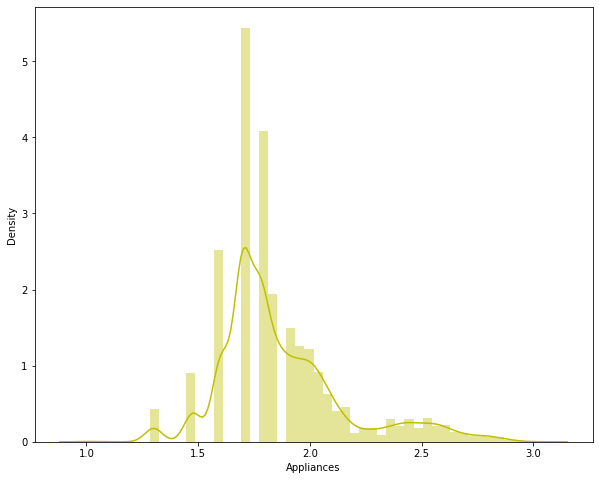

In [129]:
#Apply log transformation to the dependent variable to check if it is normally distributed or not
plt.figure(figsize = (10,8))
sns.distplot(np.log10(energy_df['Appliances']),color = 'y')

Now it is normally distributed 

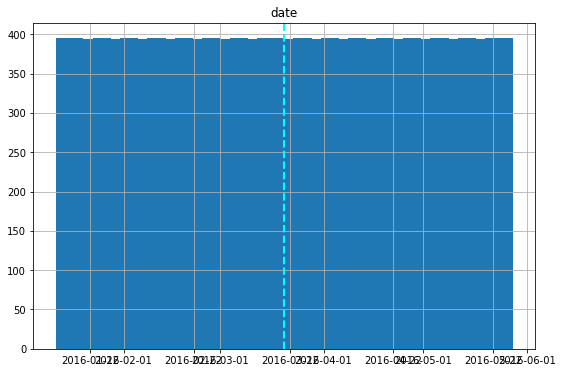

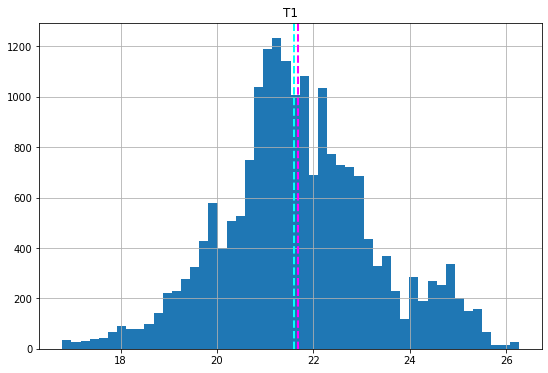

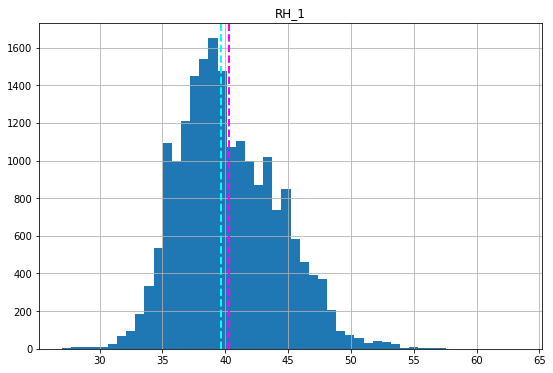

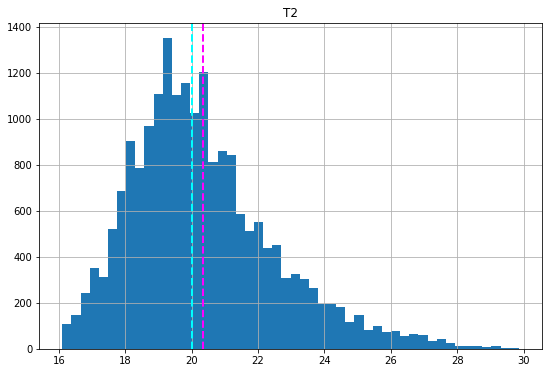

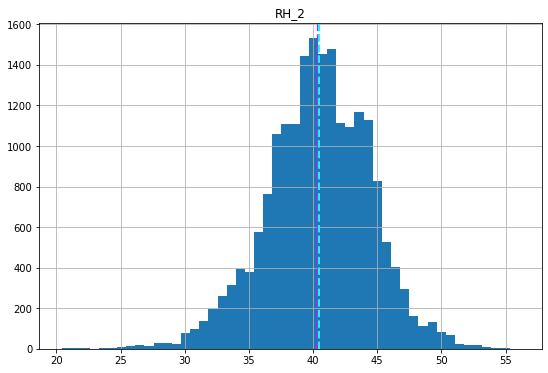

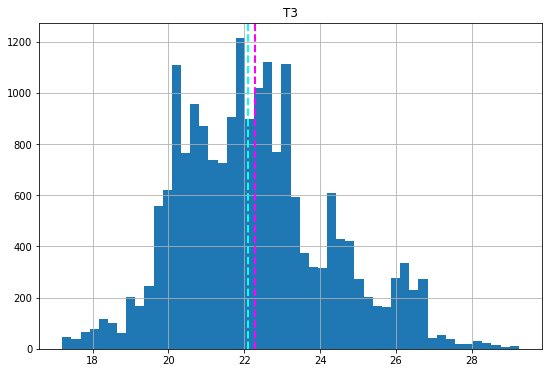

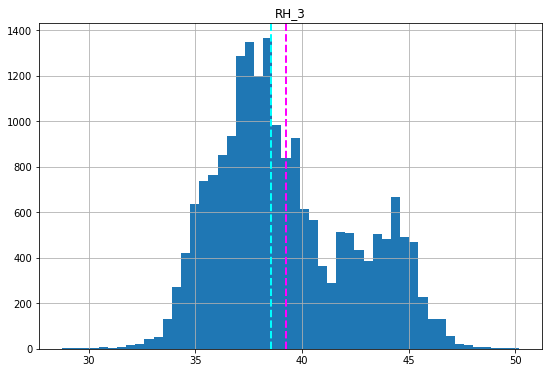

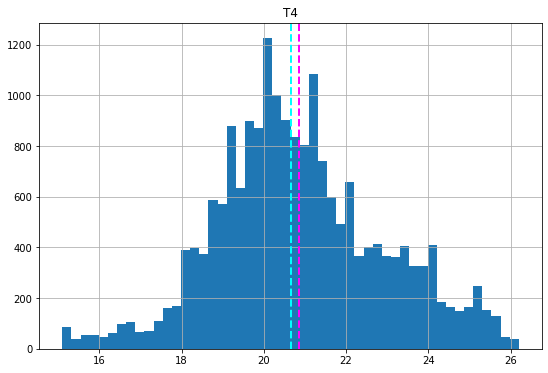

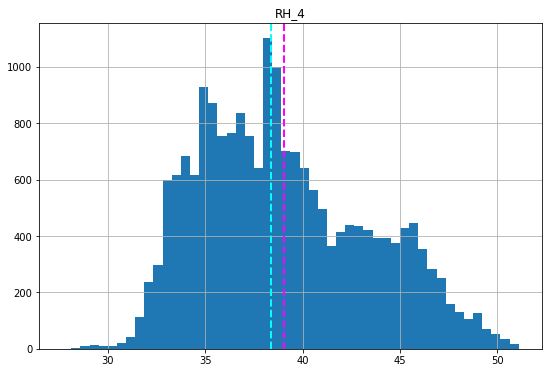

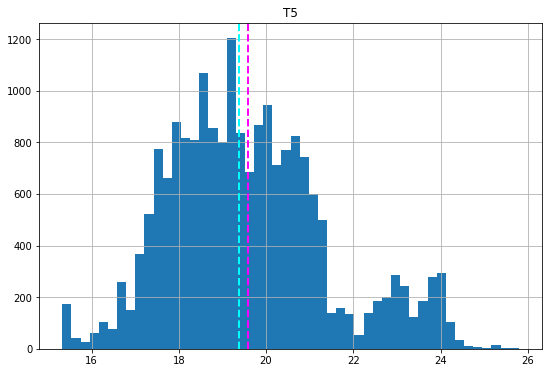

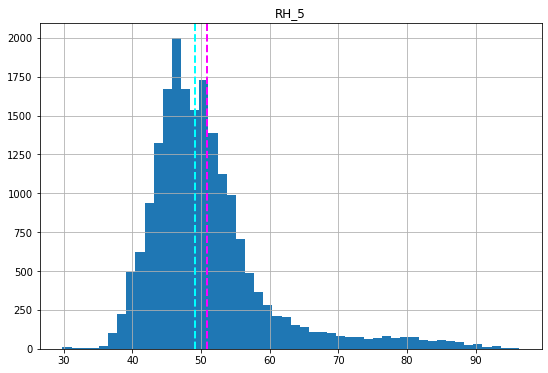

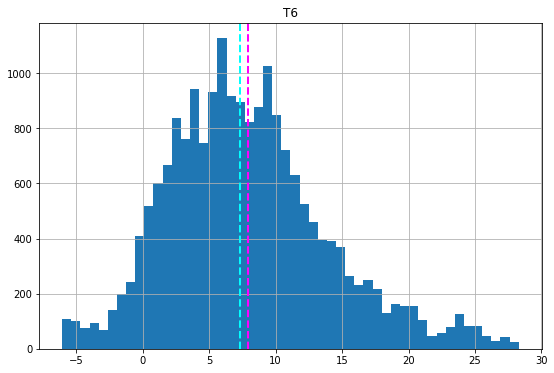

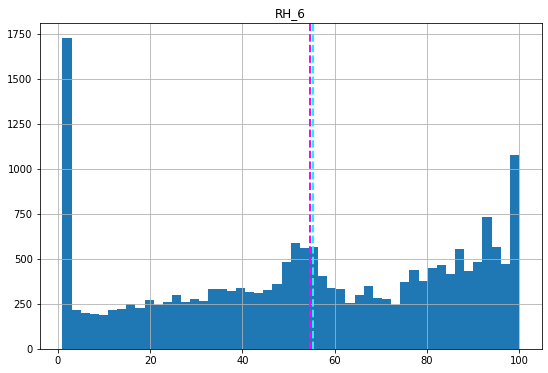

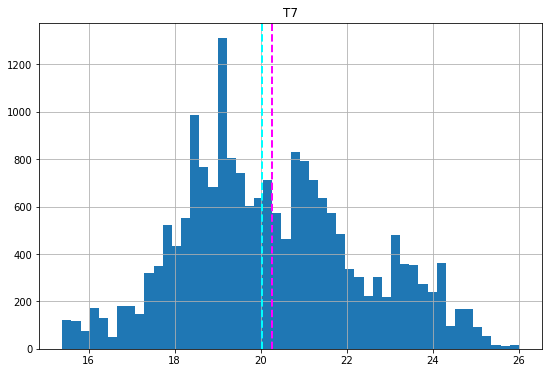

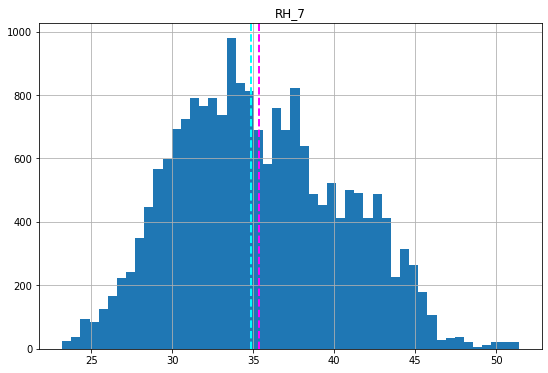

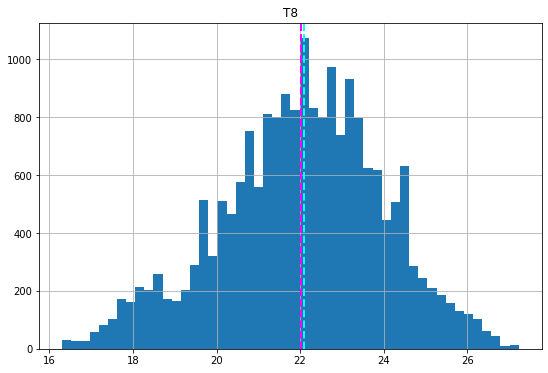

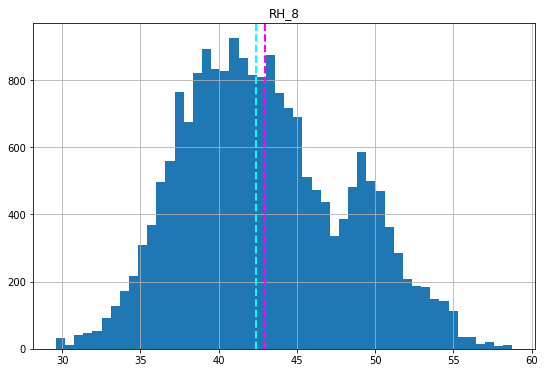

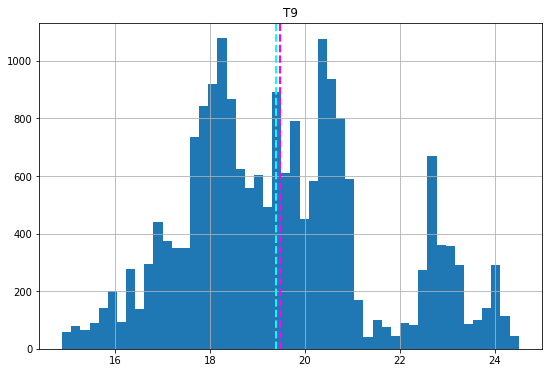

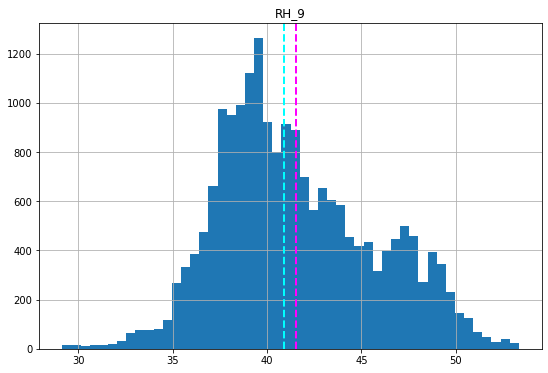

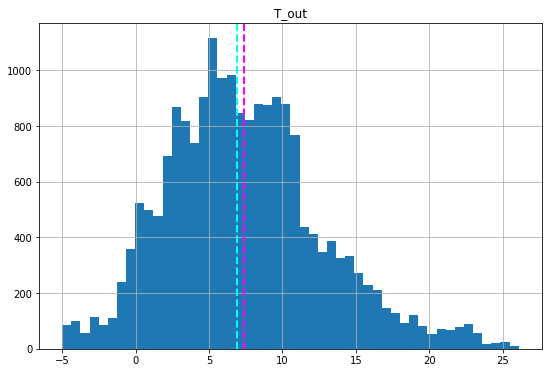

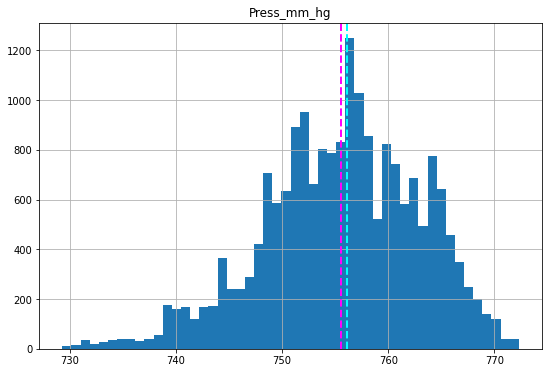

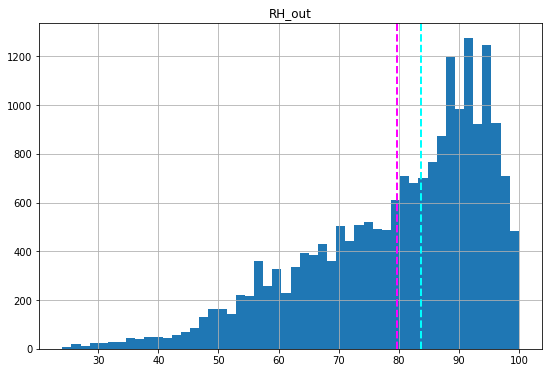

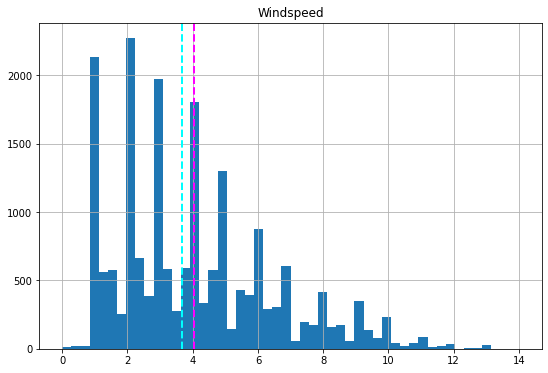

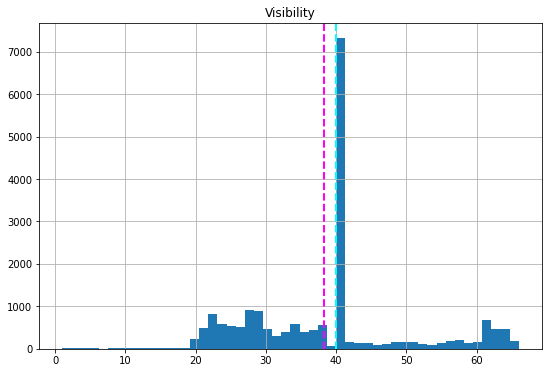

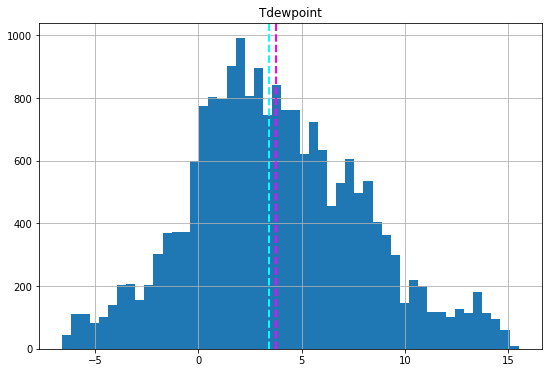

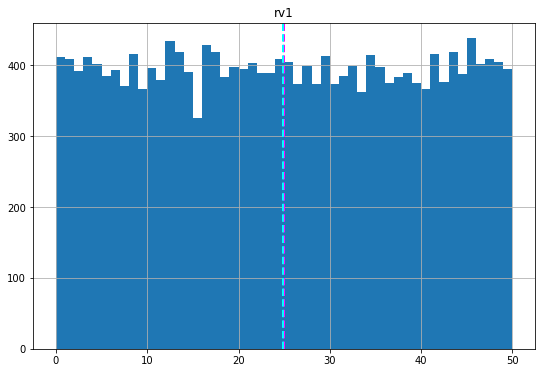

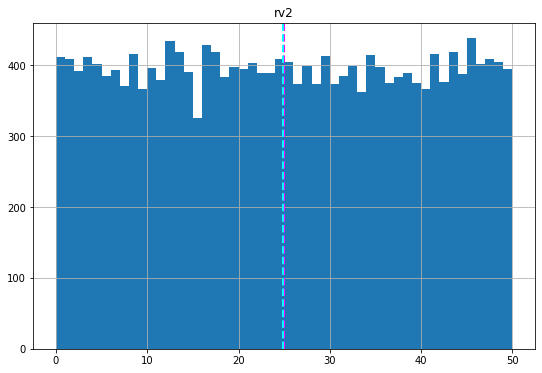

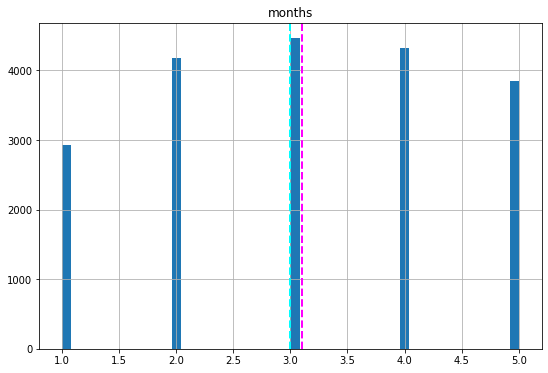

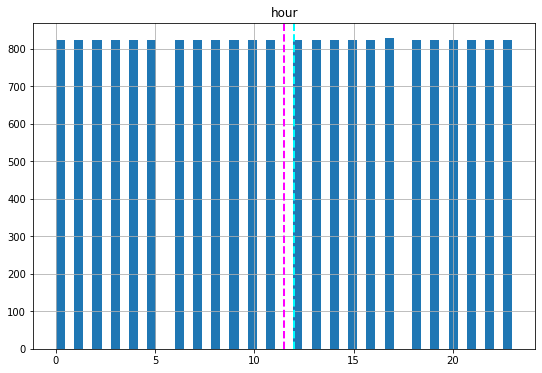

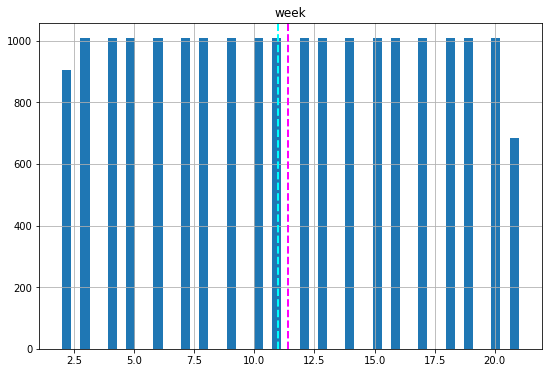

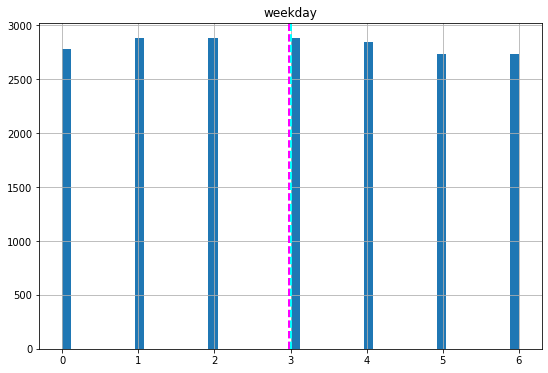

In [144]:
# plot a bar plot for each independent variable to check whether they are normally distributed or not
for col in Independent_variables[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = energy_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [157]:
numeric_features = energy_df.describe().columns
numeric_features

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'months', 'hour', 'week', 'weekday'],
      dtype='object')

In [141]:
Independent_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   T1           19735 non-null  float64       
 2   RH_1         19735 non-null  float64       
 3   T2           19735 non-null  float64       
 4   RH_2         19735 non-null  float64       
 5   T3           19735 non-null  float64       
 6   RH_3         19735 non-null  float64       
 7   T4           19735 non-null  float64       
 8   RH_4         19735 non-null  float64       
 9   T5           19735 non-null  float64       
 10  RH_5         19735 non-null  float64       
 11  T6           19735 non-null  float64       
 12  RH_6         19735 non-null  float64       
 13  T7           19735 non-null  float64       
 14  RH_7         19735 non-null  float64       
 15  T8           19735 non-null  float64       
 16  RH_8

#Check relation between Independent variables with target variable

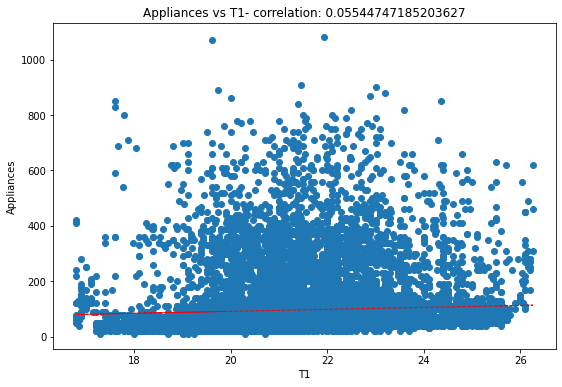

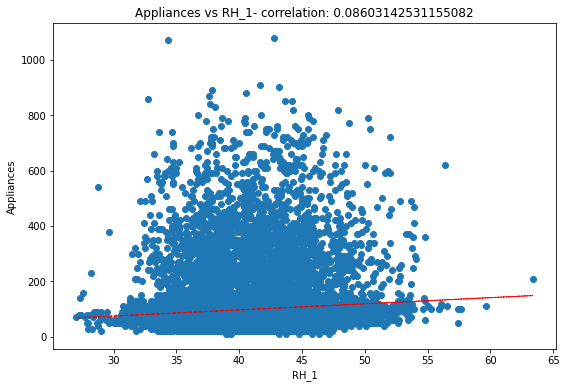

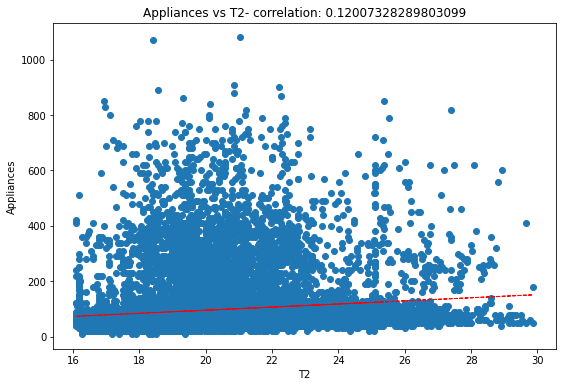

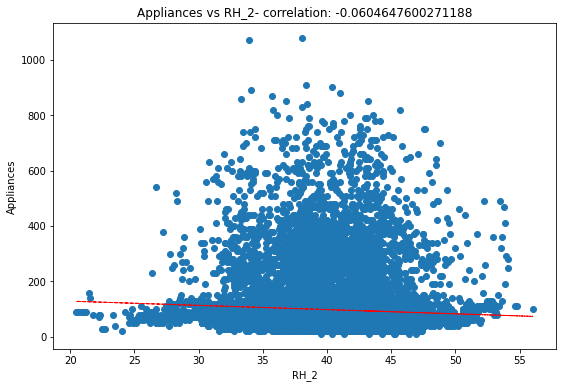

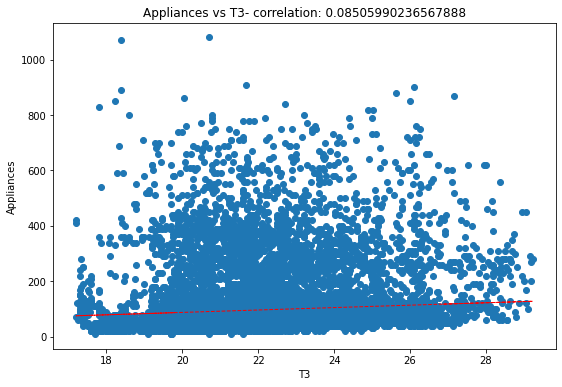

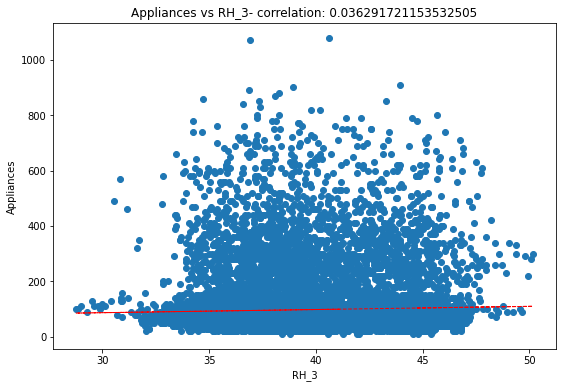

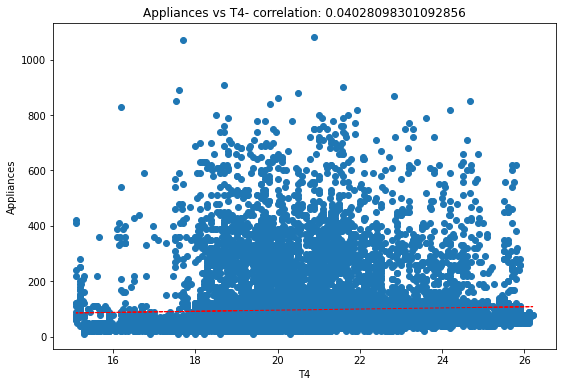

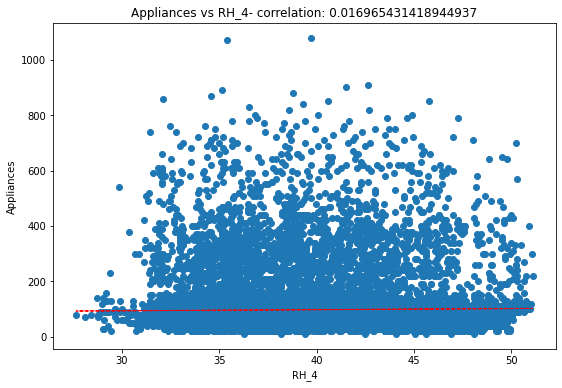

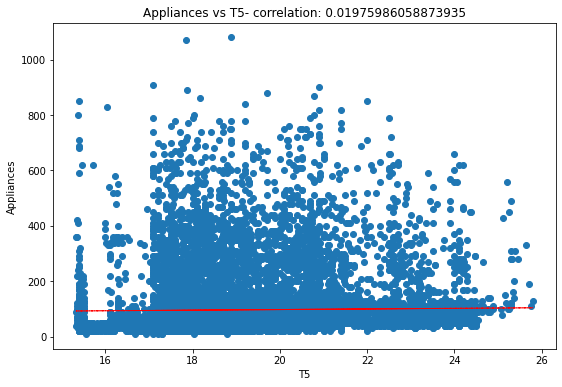

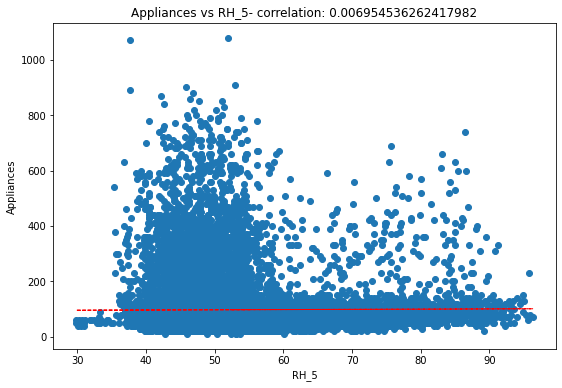

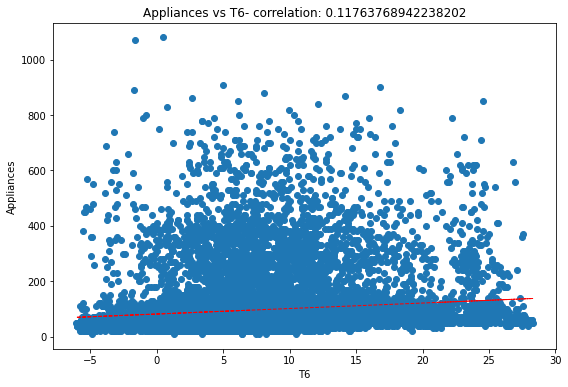

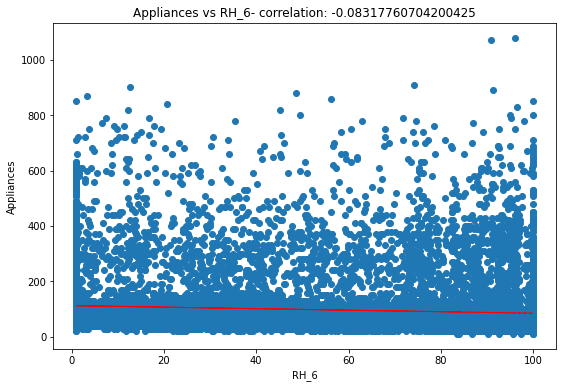

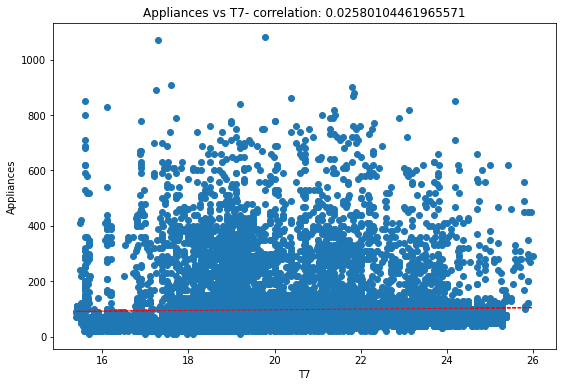

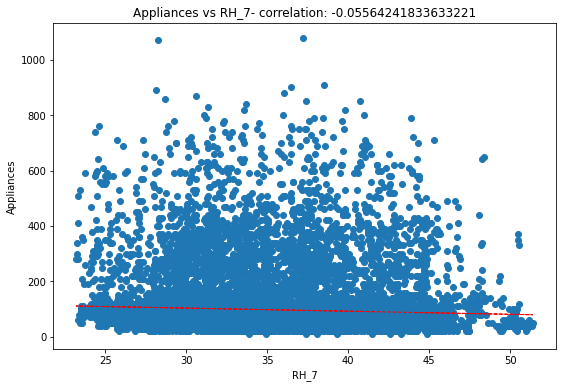

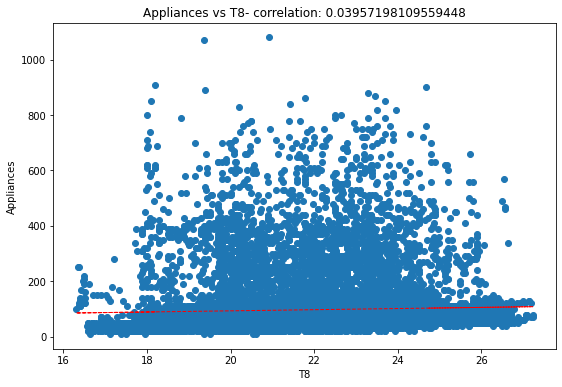

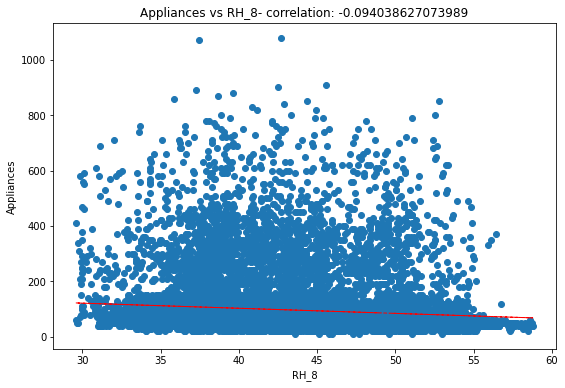

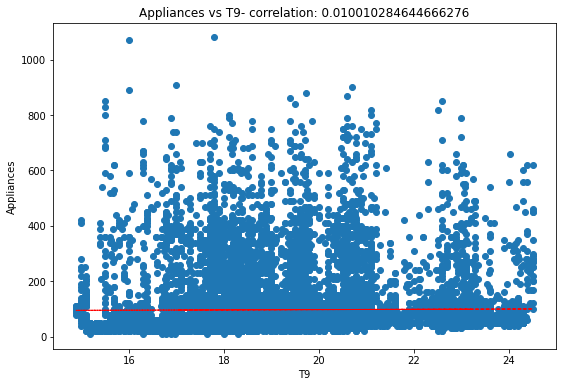

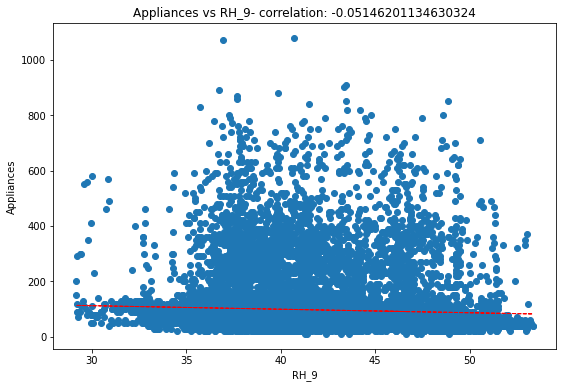

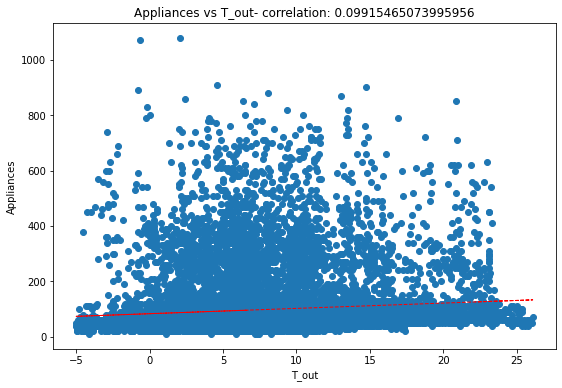

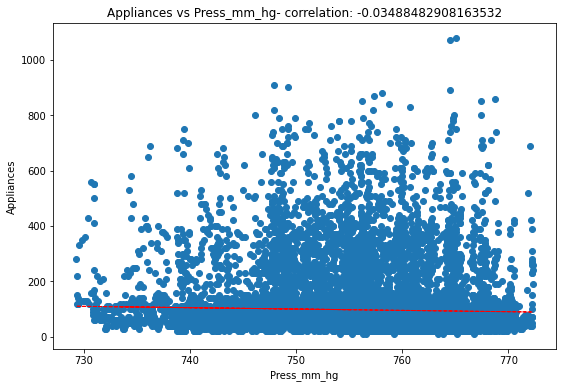

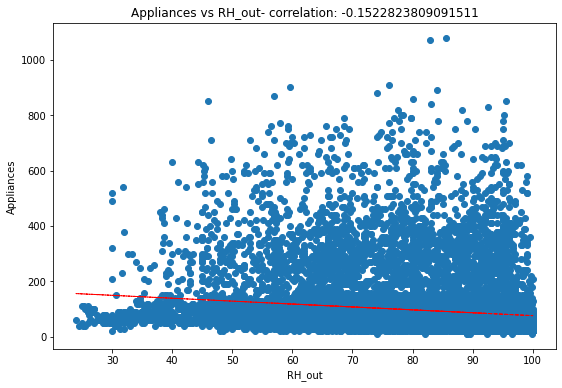

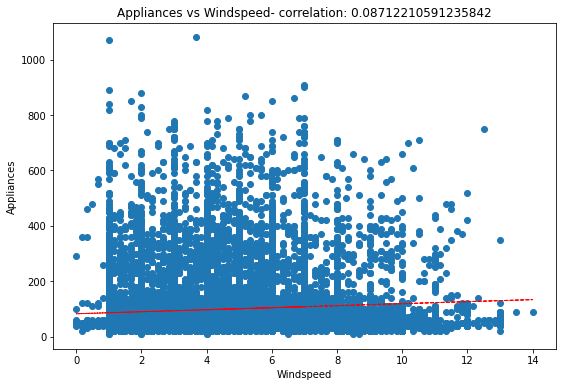

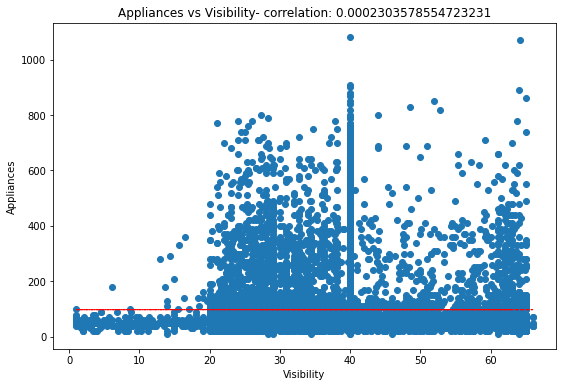

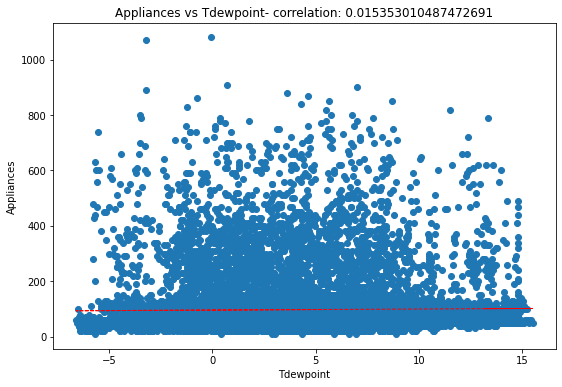

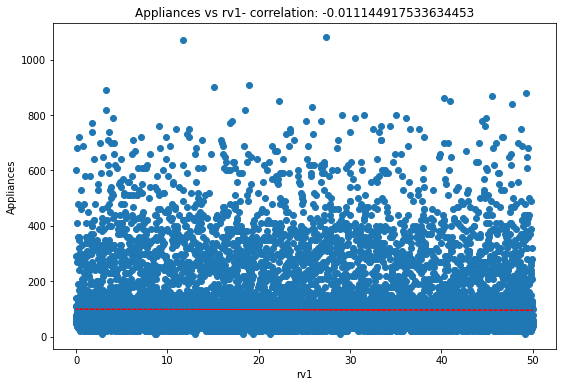

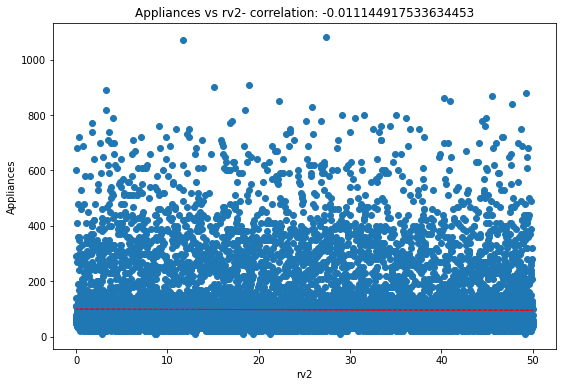

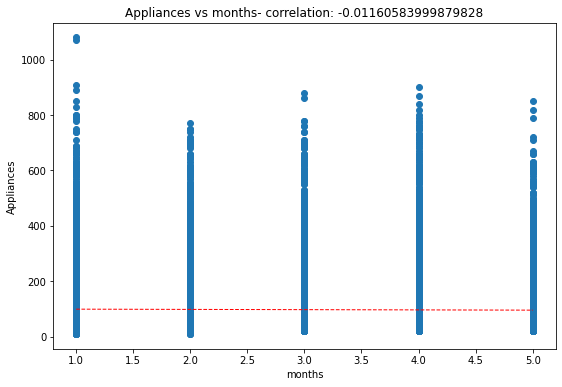

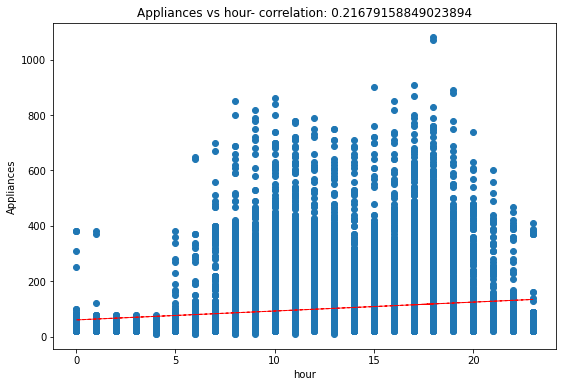

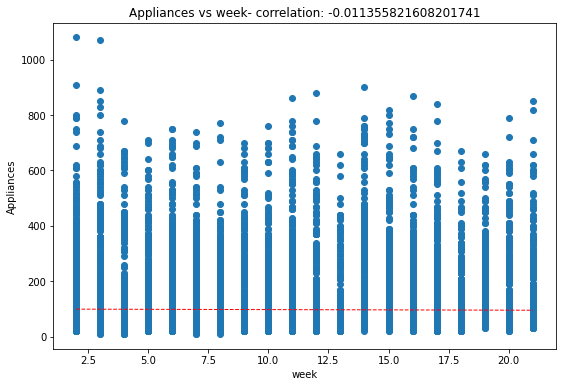

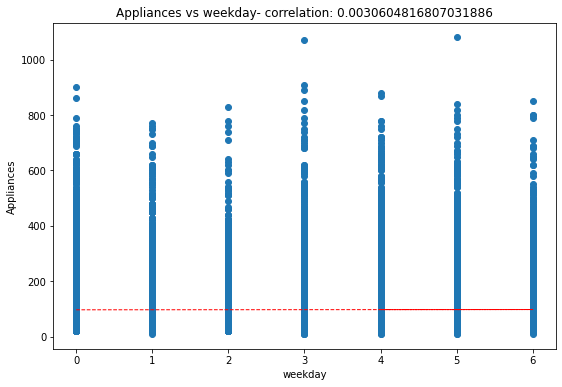

In [159]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = energy_df[col]
    label = energy_df['Appliances']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Appliances')
    ax.set_title('Appliances vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(energy_df[col], energy_df['Appliances'], 1)
    y_hat = np.poly1d(z)(energy_df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

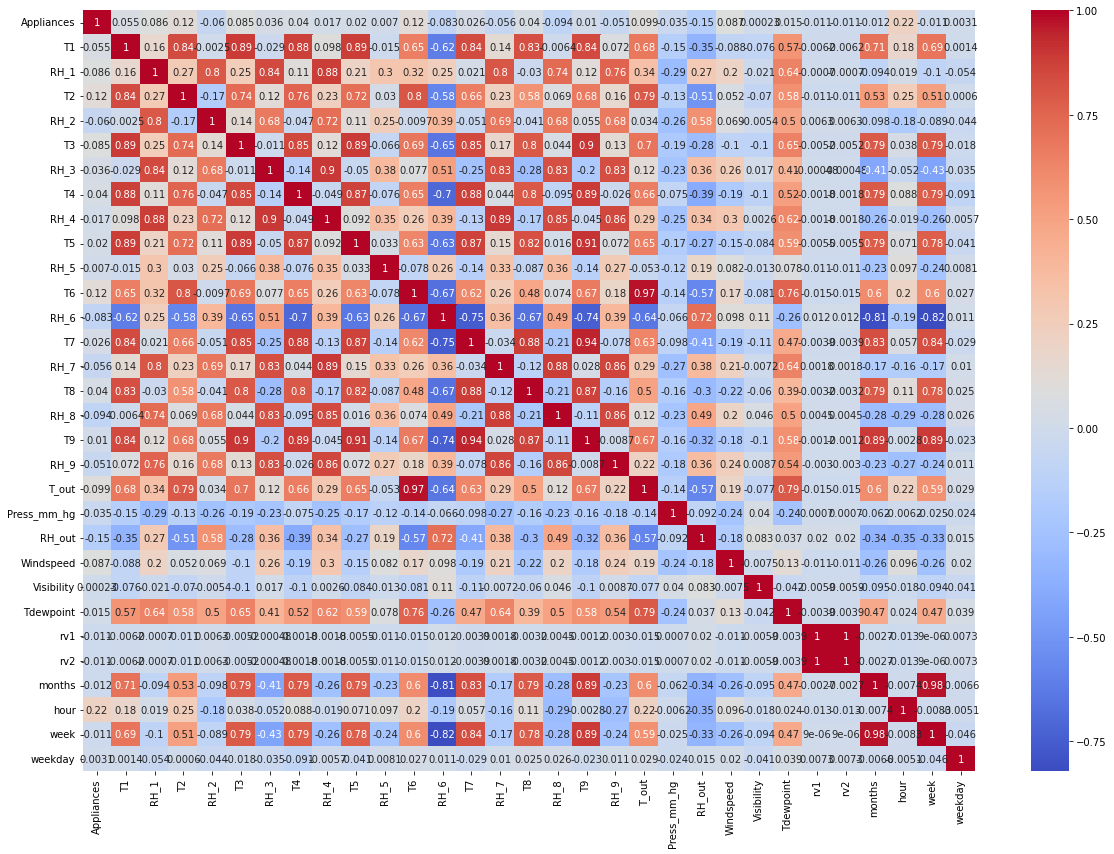

In [169]:
## Correlation
plt.figure(figsize=(20,14))
correlation = energy_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [163]:
correlation.Appliances

Appliances     1.000000
T1             0.055447
RH_1           0.086031
T2             0.120073
RH_2          -0.060465
T3             0.085060
RH_3           0.036292
T4             0.040281
RH_4           0.016965
T5             0.019760
RH_5           0.006955
T6             0.117638
RH_6          -0.083178
T7             0.025801
RH_7          -0.055642
T8             0.039572
RH_8          -0.094039
T9             0.010010
RH_9          -0.051462
T_out          0.099155
Press_mm_hg   -0.034885
RH_out        -0.152282
Windspeed      0.087122
Visibility     0.000230
Tdewpoint      0.015353
rv1           -0.011145
rv2           -0.011145
months        -0.011606
hour           0.216792
week          -0.011356
weekday        0.003060
Name: Appliances, dtype: float64

##Checking multicollearity with vif method 

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [166]:
calc_vif(energy_df[[i for i in energy_df.describe().columns if i not in ['Appliances']]])

variables          VIF
0            T1  3705.385966
1          RH_1  1672.448745
2            T2  2504.055650
3          RH_2  2166.128899
4            T3  1332.442185
5          RH_3  1639.186115
6            T4   973.257803
7          RH_4  1426.123864
8            T5  1200.880166
9          RH_5    45.969383
10           T6    91.223613
11         RH_6    52.712878
12           T7  1654.948182
13         RH_7   520.837212
14           T8  1008.781581
15         RH_8   640.528974
16           T9  2905.669293
17         RH_9   725.632858
18        T_out   427.485103
19  Press_mm_hg  2189.372393
20       RH_out  1403.216669
21    Windspeed     5.401831
22   Visibility    12.113679
23    Tdewpoint   136.058289
24          rv1          inf
25          rv2          inf
26       months   178.198226
27         hour     7.866287
28         week   170.742431
29      weekday     3.756761

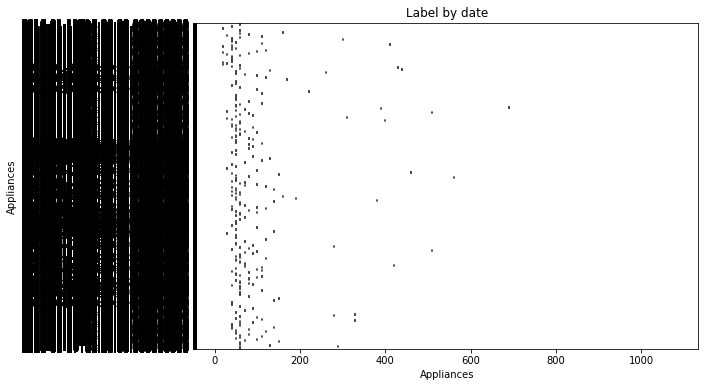

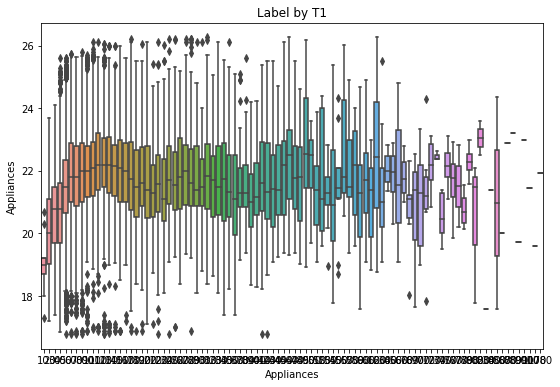

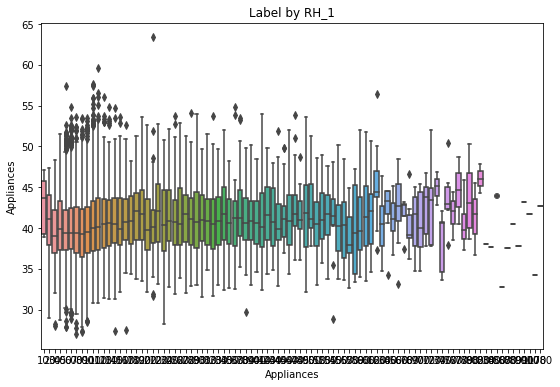

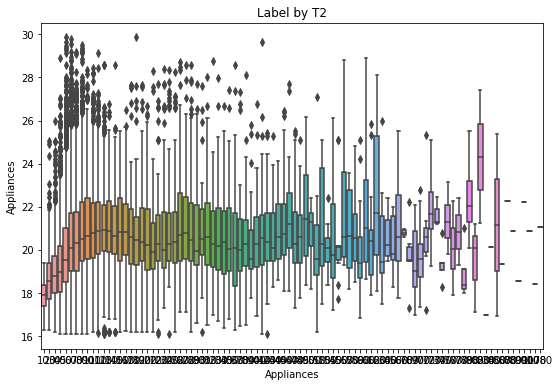

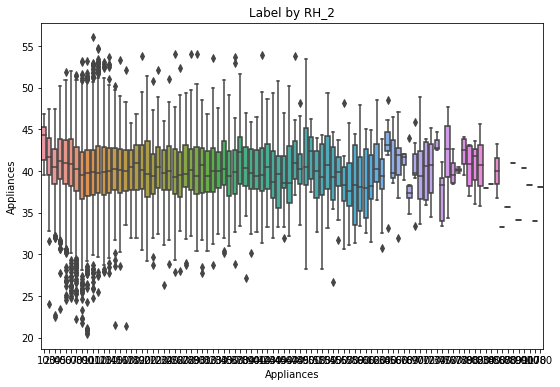

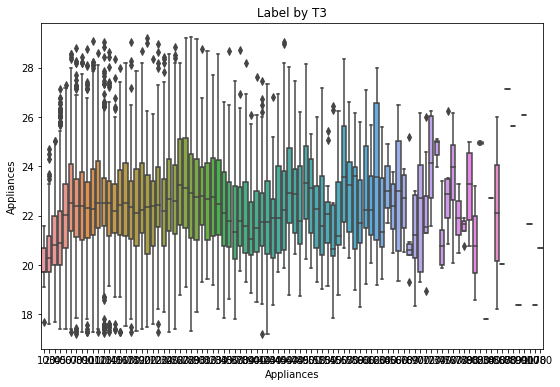

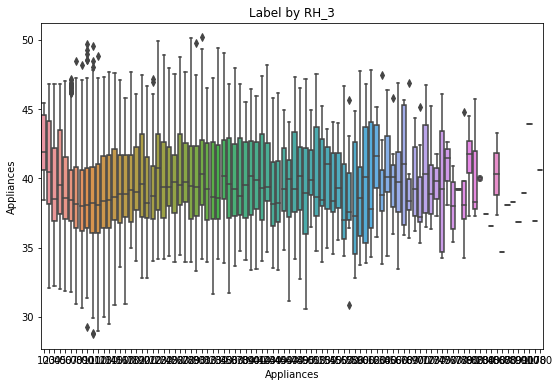

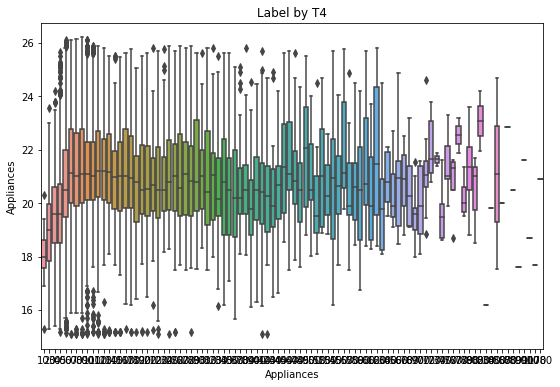

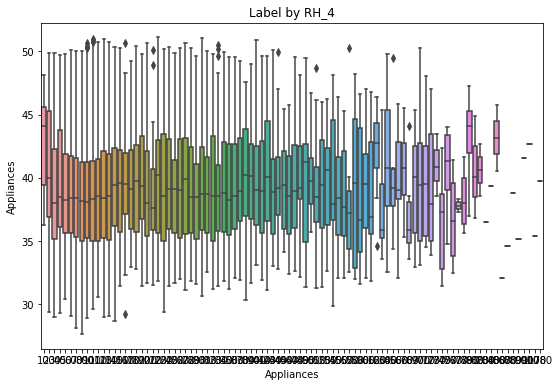

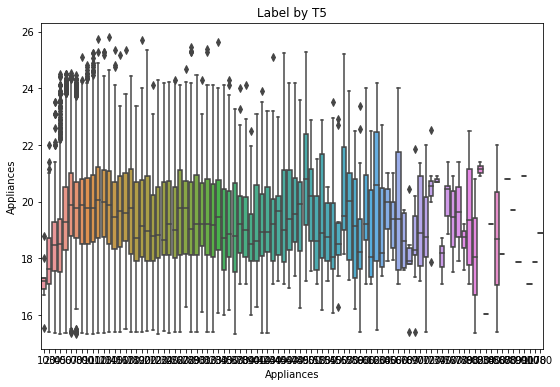

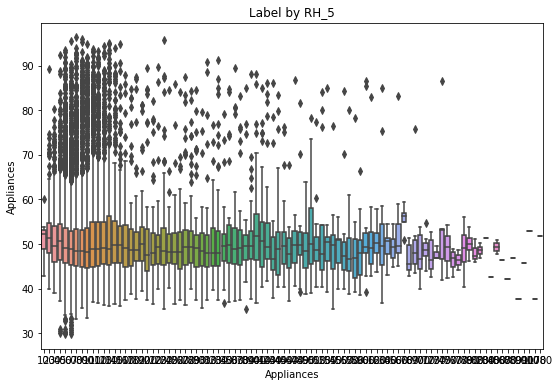

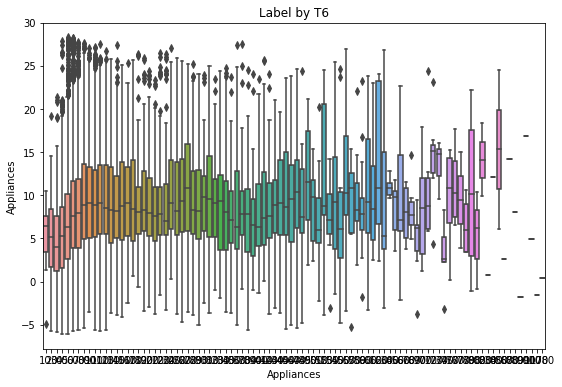

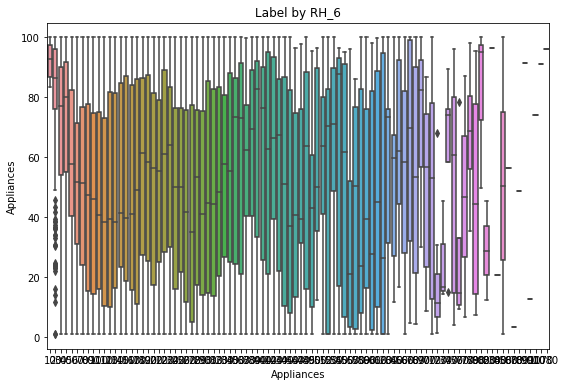

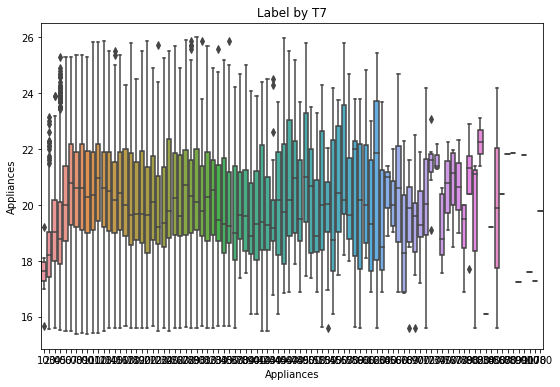

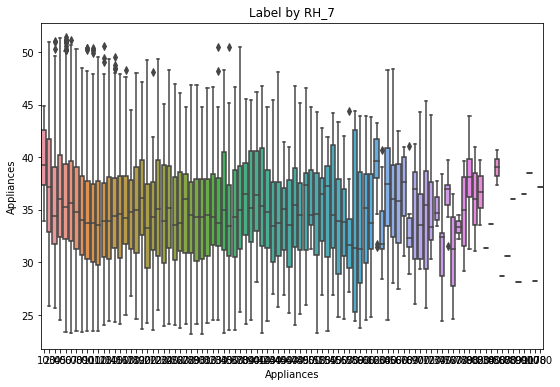

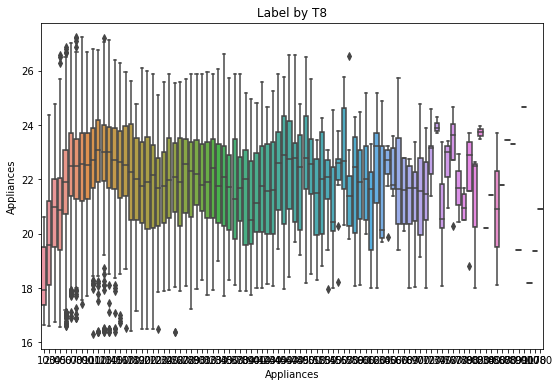

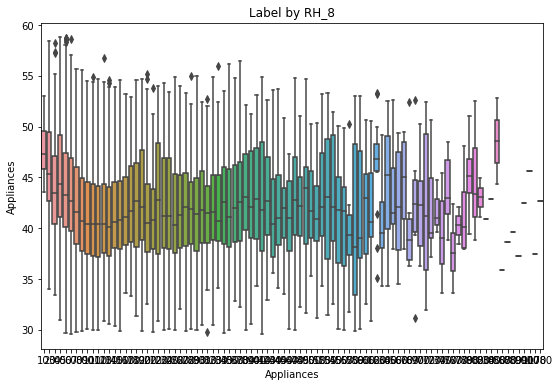

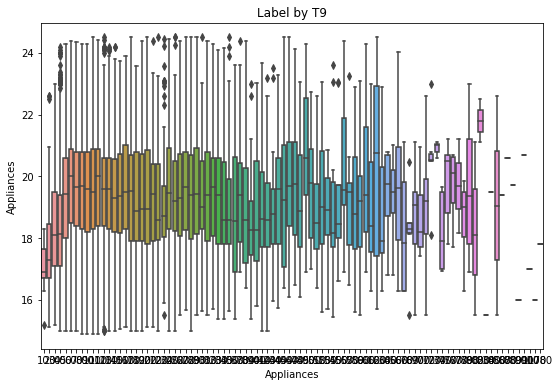

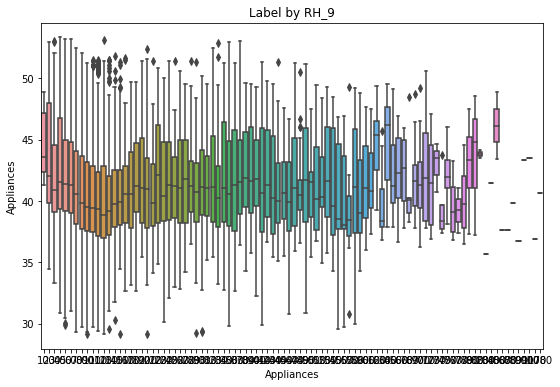

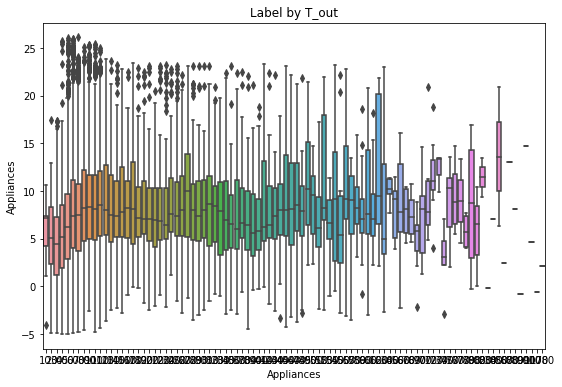

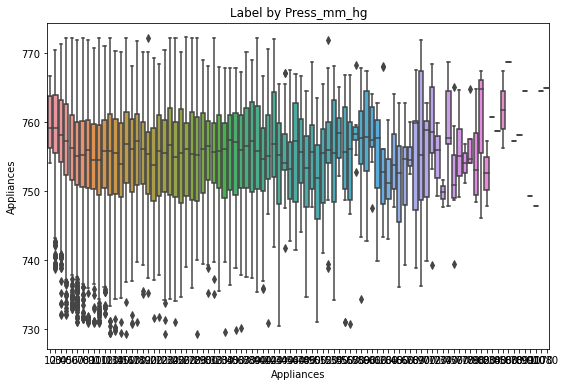

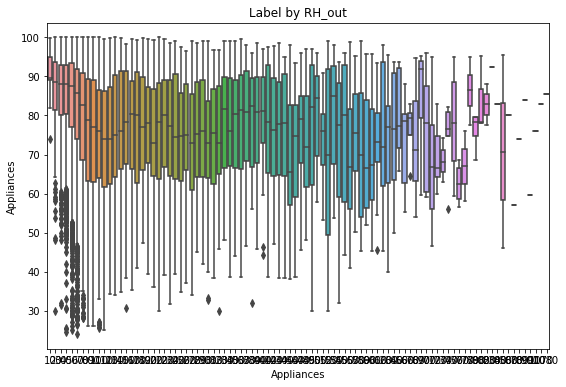

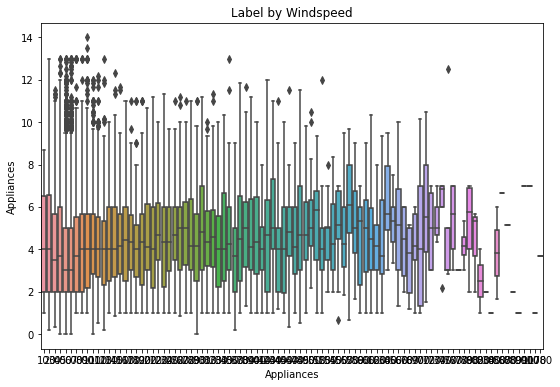

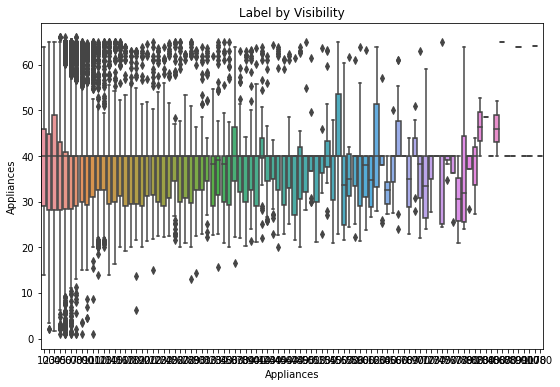

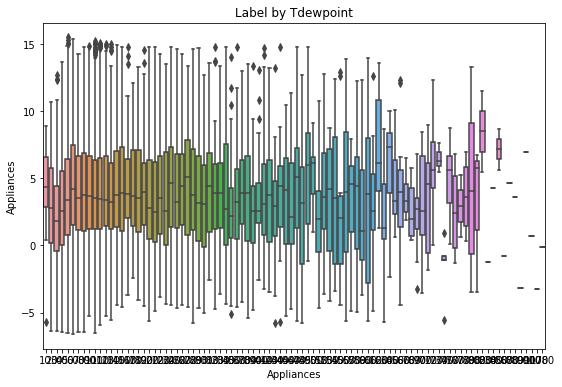

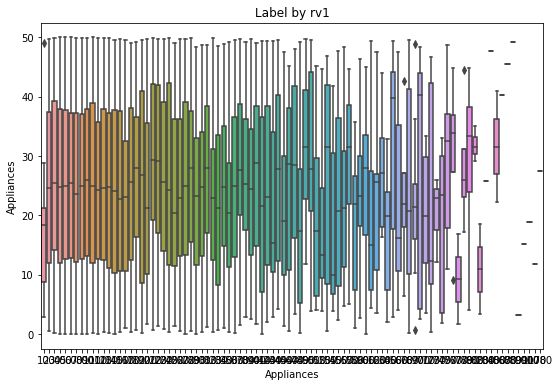

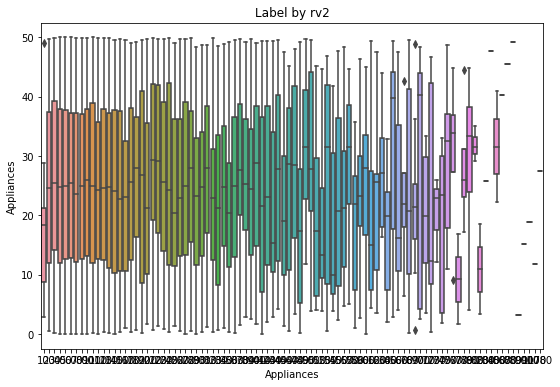

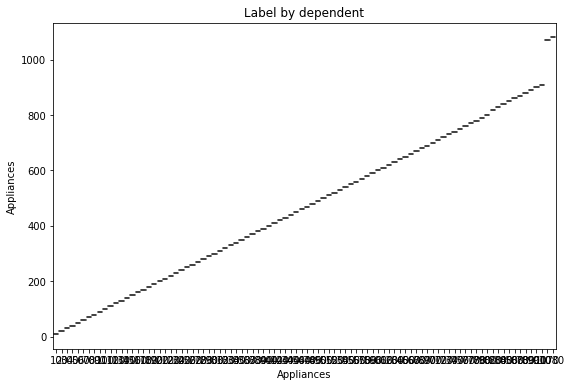

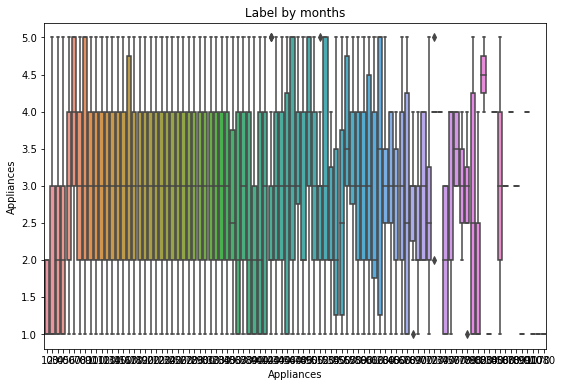

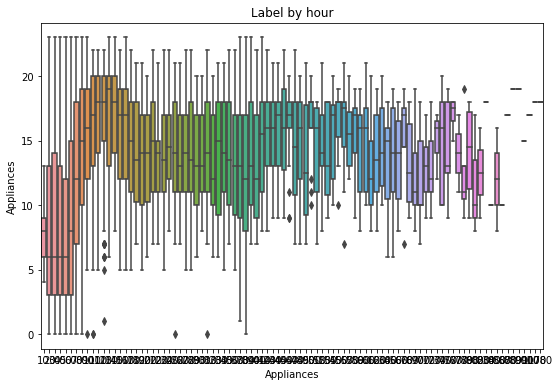

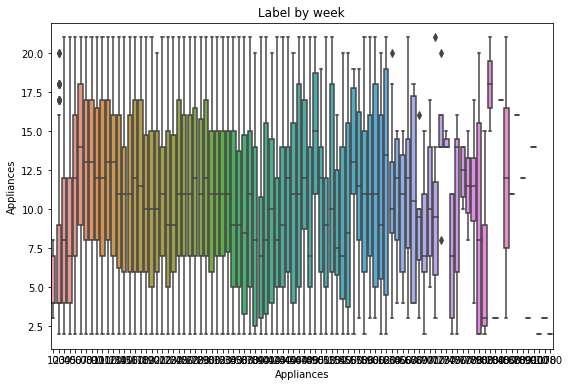

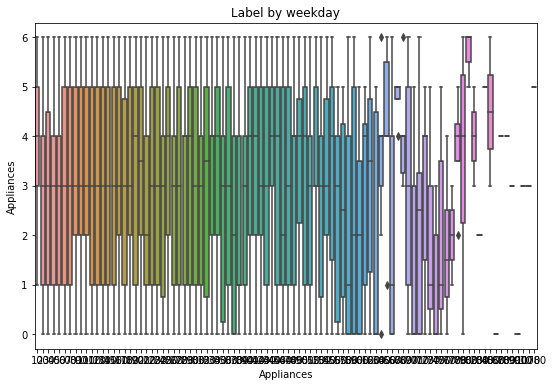

In [33]:
#Checking Outliers
for col in energy_df.columns:
  if(col!='Appliances'):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(energy_df['Appliances'], energy_df[col], ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Appliances")
plt.show()

#Removing Outliers

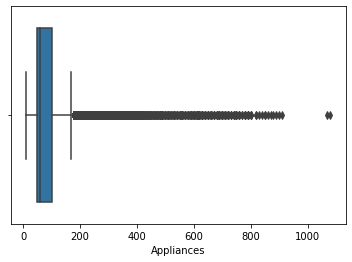

In [34]:
#Checking outliers 
sns.boxplot(energy_df['Appliances'])

We can see that there are lot of outliers present in the dataset

In [170]:
percentile_q1 = np.percentile(energy_df['Appliances'],25)
print(percentile_q1)
percentile_q2 = np.percentile(energy_df['Appliances'],50)
print(percentile_q2)
percentile_q3 = np.percentile(energy_df['Appliances'],75)
print(percentile_q3)

50.0
60.0
100.0


In [171]:
iq_range = percentile_q3 - percentile_q1
iq_range

50.0

In [172]:
upper = percentile_q3+1.5*iq_range
lower = percentile_q1-1.5*iq_range
print(upper,lower)

175.0 -25.0


In [173]:
energy = energy_df[(energy_df['Appliances']<=upper)]


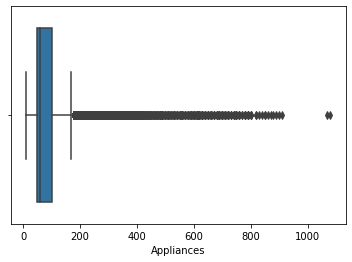

In [174]:
sns.boxplot(energy_df['Appliances'])

Now checking outliers for other columns

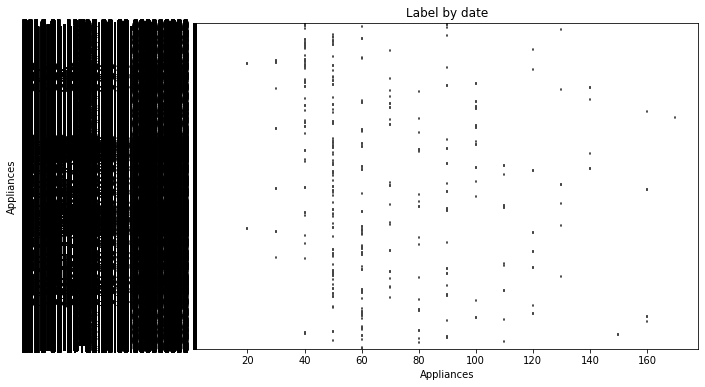

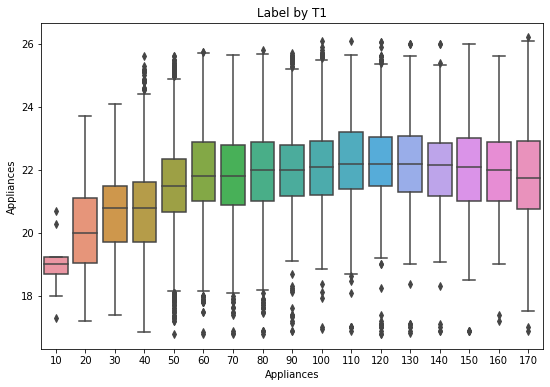

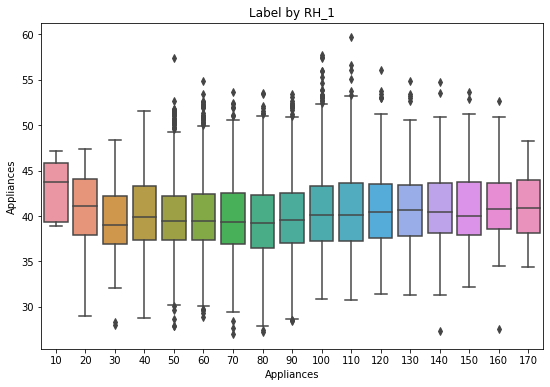

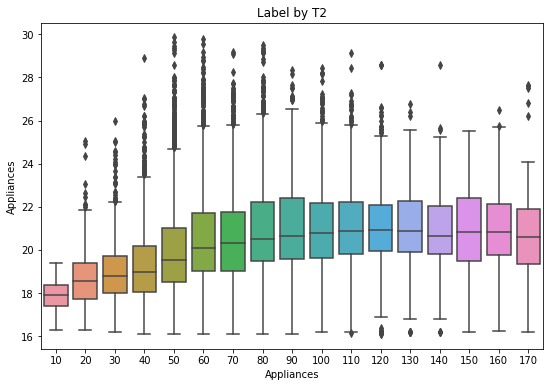

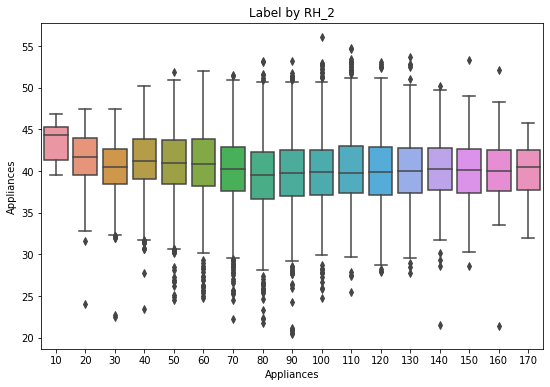

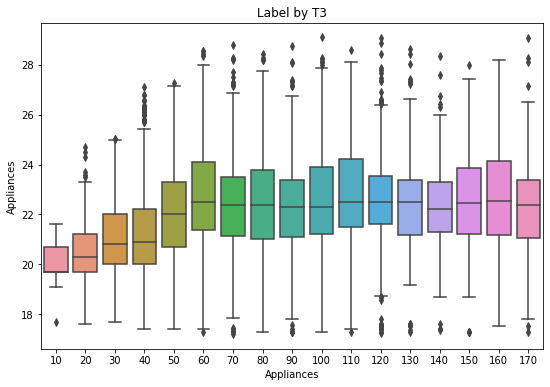

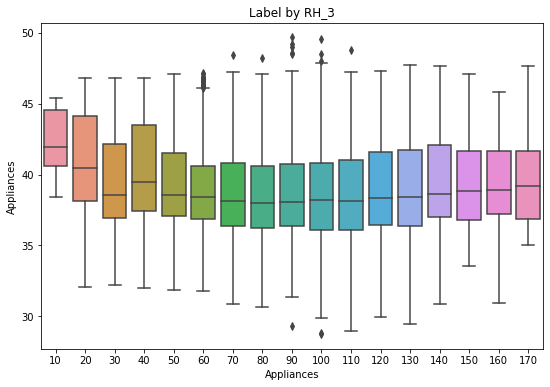

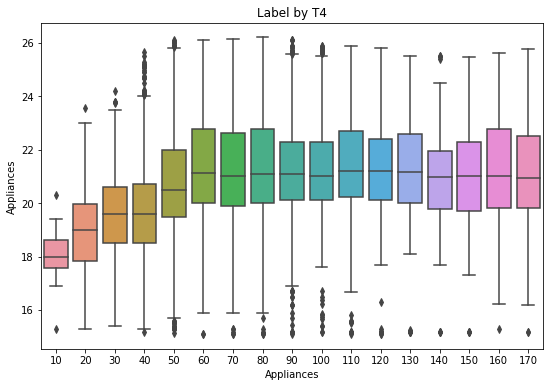

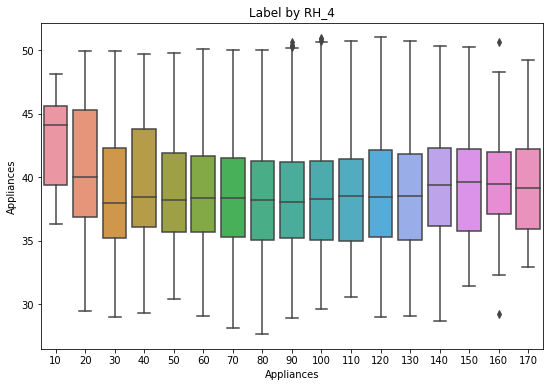

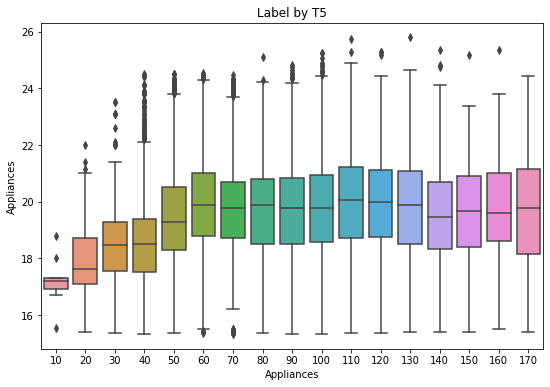

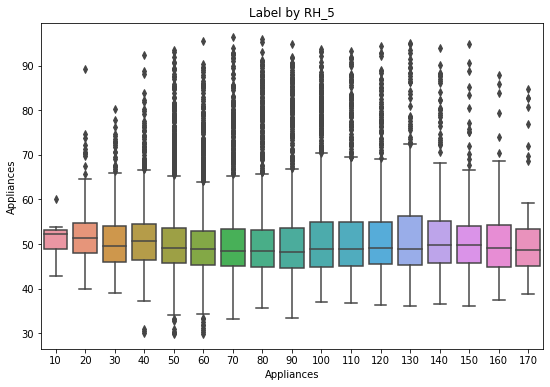

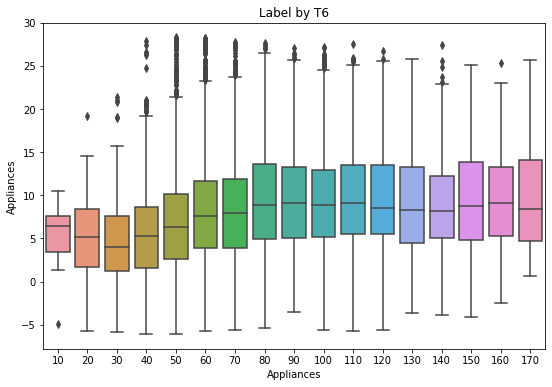

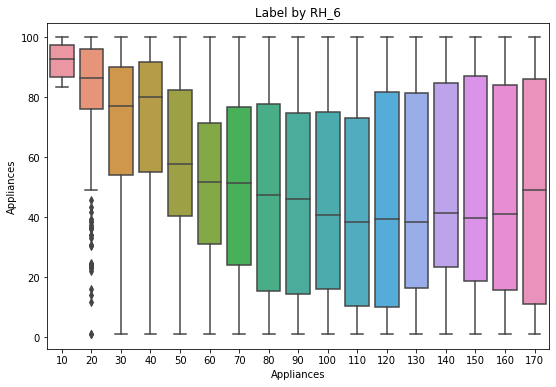

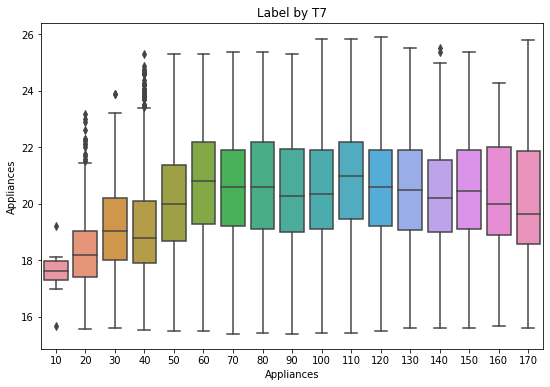

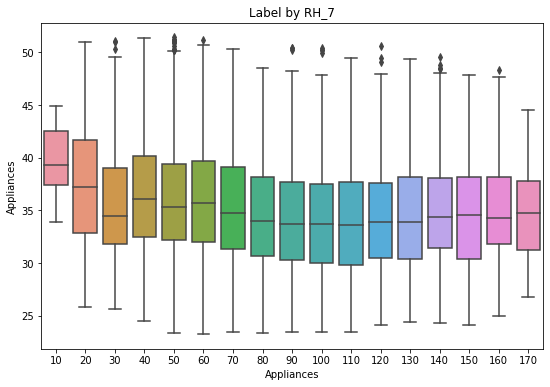

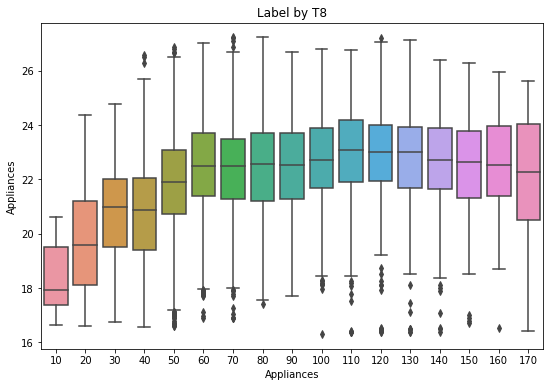

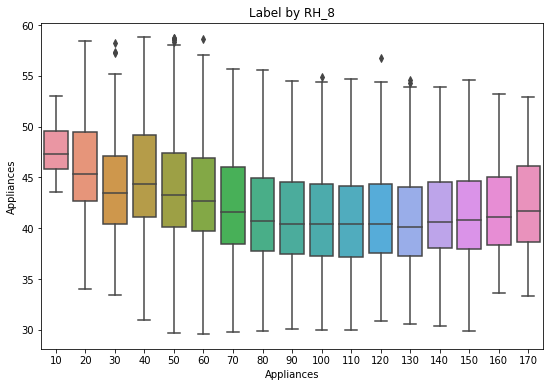

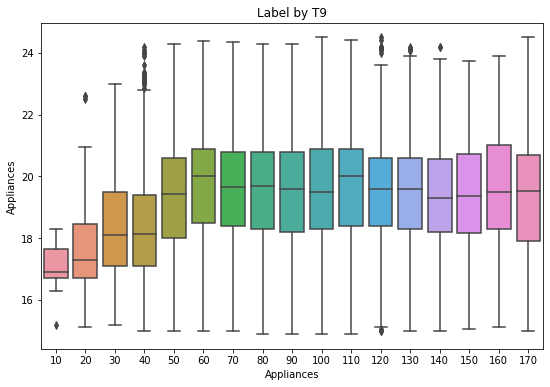

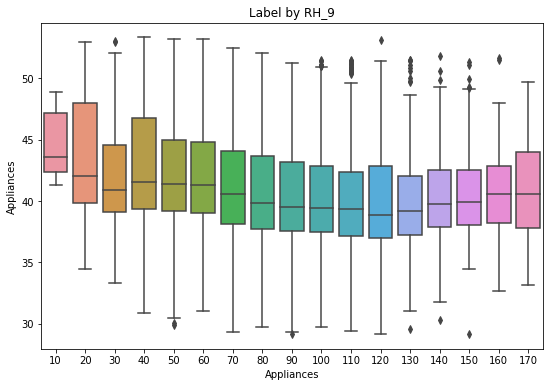

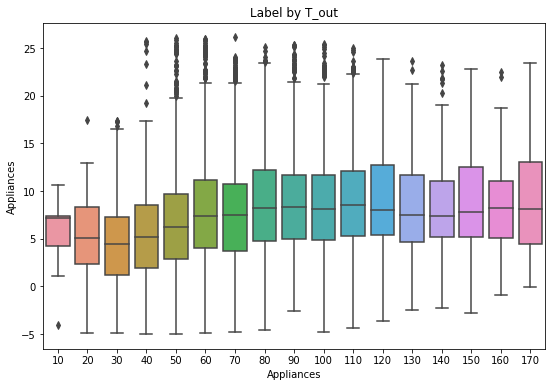

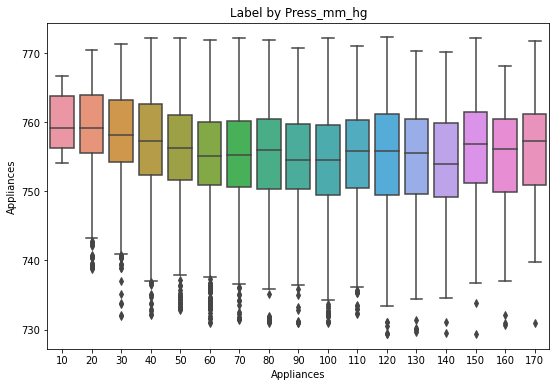

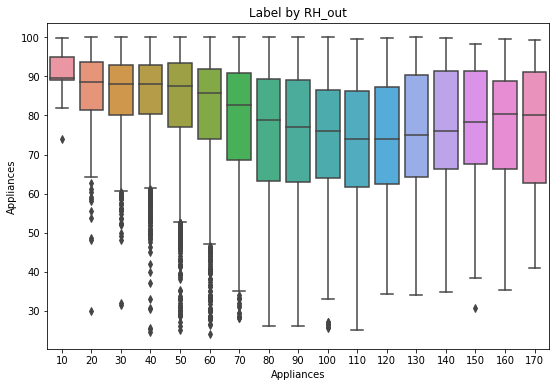

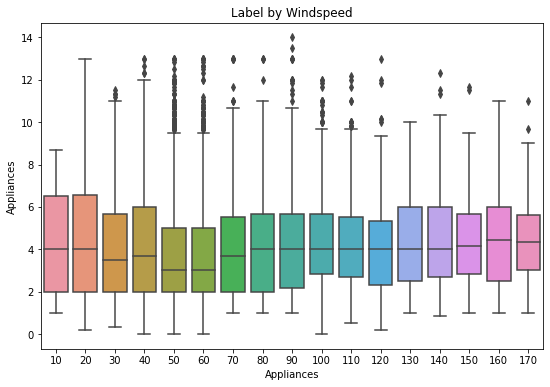

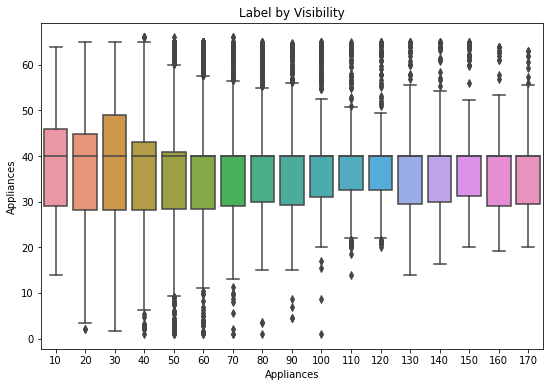

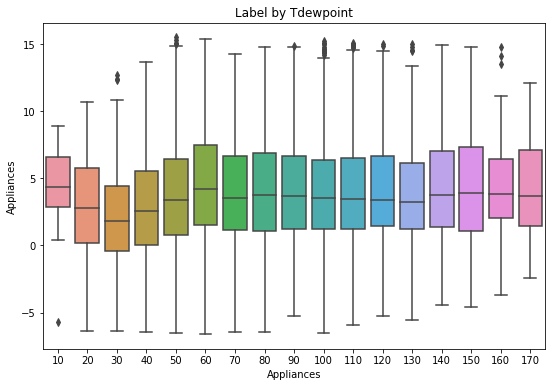

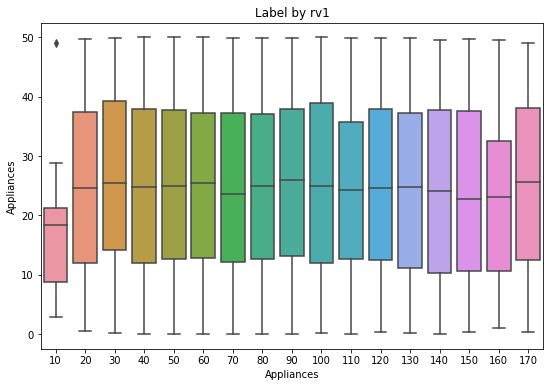

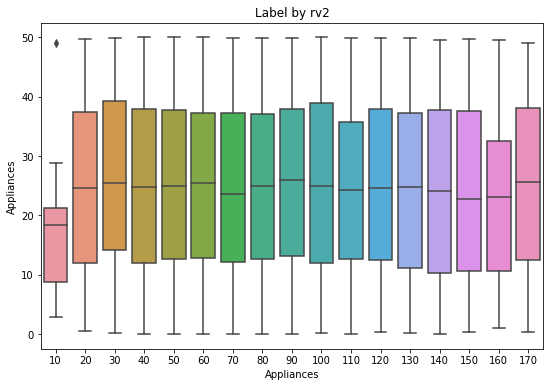

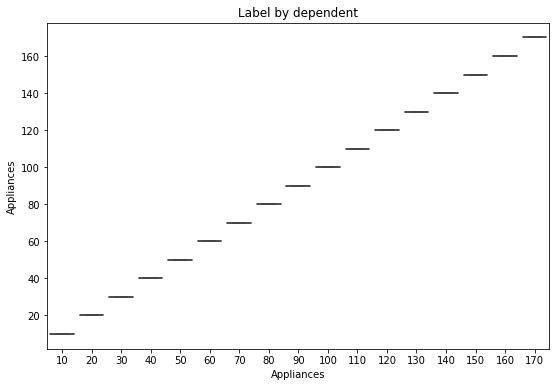

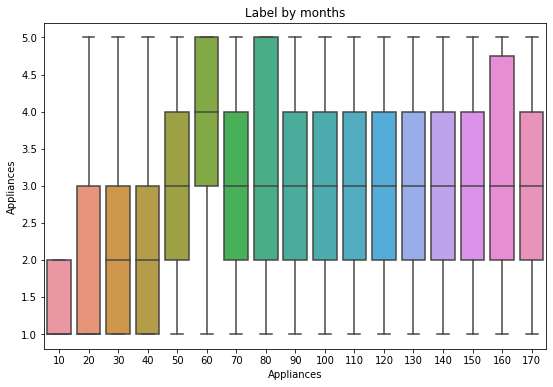

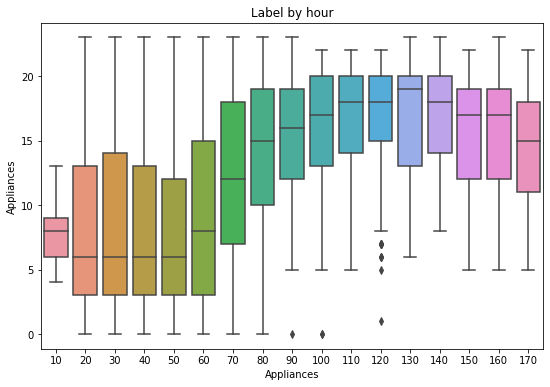

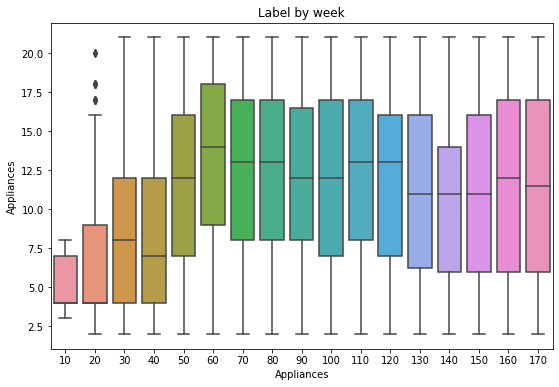

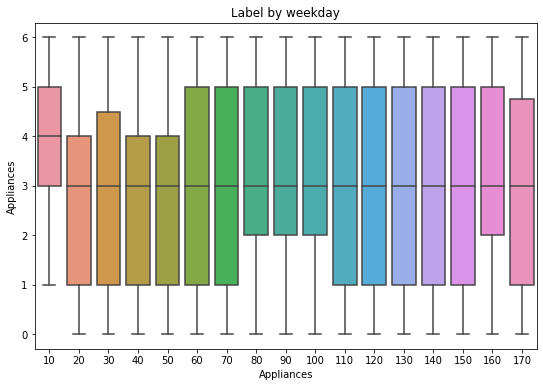

In [40]:
#Plot a boxplot for the label by each column
for col in energy_df.columns:
  if(col!='Appliances'):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    sns.boxplot(energy_df['Appliances'], energy[col], ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Appliances")
plt.show()